### Comparisons of Loads vs Temp and fitting them

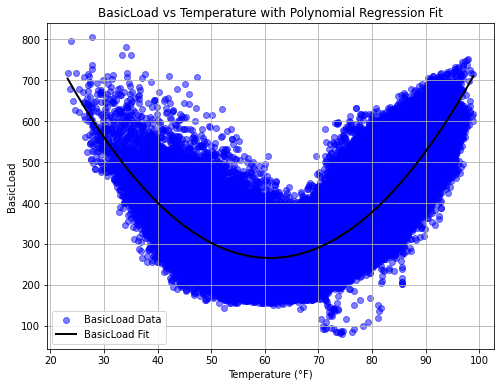

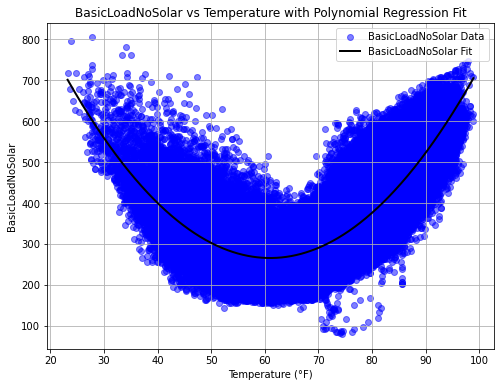

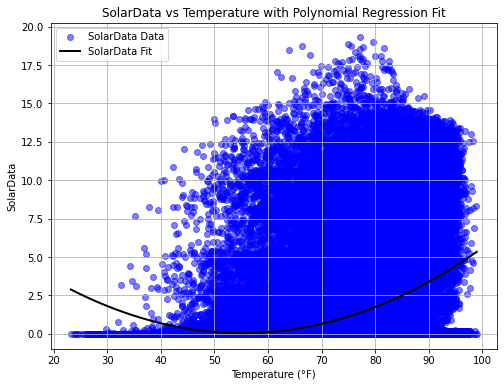

Fitted function for BasicLoad:
        2
0.3076 x - 37.48 x + 1408
Fitted function for BasicLoadNoSolar:
        2
0.3048 x - 37.18 x + 1399
Fitted function for SolarData:
          2
0.002768 x - 0.3057 x + 8.489


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.polynomial.polynomial import Polynomial

# Read the CSV file
data = pd.read_csv('merged_load_weather_data.csv')

# Columns of interest
columns_to_plot = ["BasicLoad", "BasicLoadNoSolar", "SolarData"]
temperature = data["Temp"]

# Initialize a dictionary to store fitted functions
fitted_functions = {}

for column in columns_to_plot:
    load = data[column]

    # Clean data: remove rows with NaN or infinite values
    valid_data = ~np.isnan(temperature) & ~np.isnan(load) & np.isfinite(temperature) & np.isfinite(load)
    clean_temperature = temperature[valid_data]
    clean_load = load[valid_data]

    # Fit a 2nd-degree polynomial (or modify as needed)
    coeffs = np.polyfit(clean_temperature, clean_load, 2)
    fitted_poly = np.poly1d(coeffs)

    # Store the function
    fitted_functions[column] = fitted_poly

    # Generate fitted values for the temperature range
    temperature_fit = np.linspace(clean_temperature.min(), clean_temperature.max(), 500)
    load_fit = fitted_poly(temperature_fit)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(clean_temperature, clean_load, color="blue", alpha=0.5, label=f"{column} Data")
    plt.plot(temperature_fit, load_fit, color="black", linewidth=2, label=f"{column} Fit")
    plt.title(f"{column} vs Temperature with Polynomial Regression Fit")
    plt.xlabel("Temperature (°F)")
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

# Output the fitted functions
for column, function in fitted_functions.items():
    print(f"Fitted function for {column}:")
    print(function)


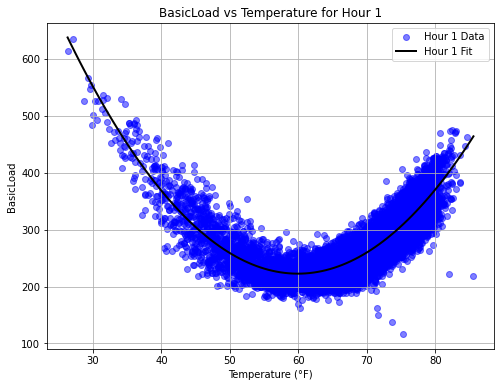

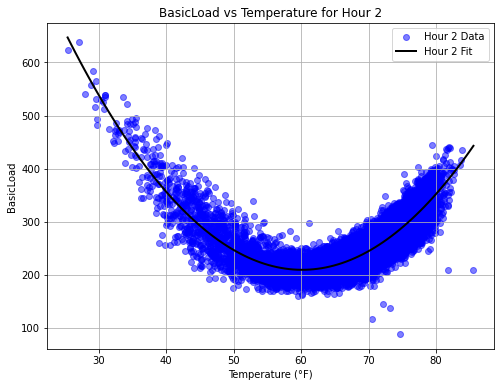

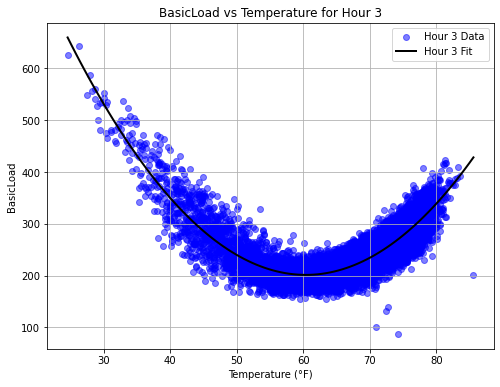

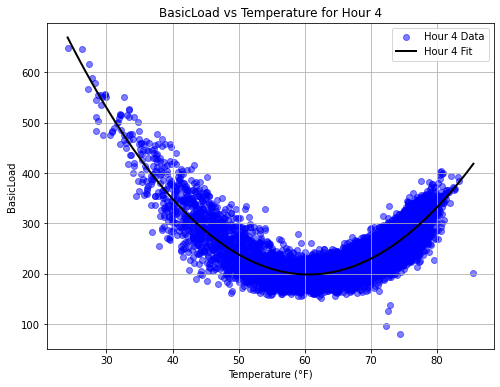

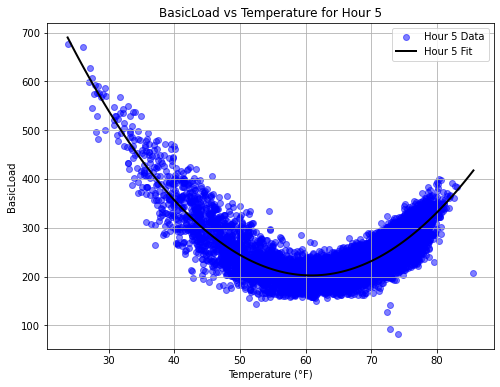

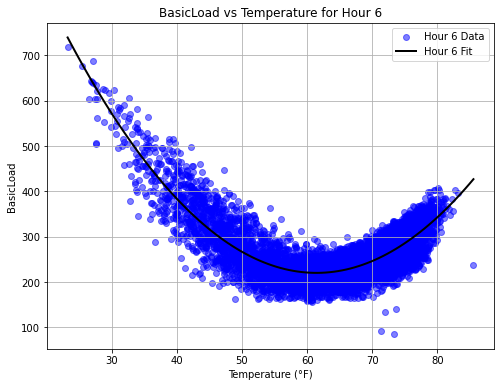

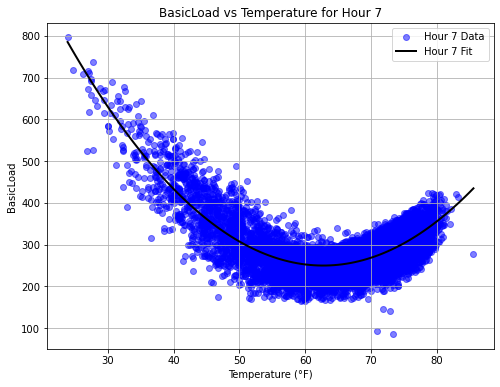

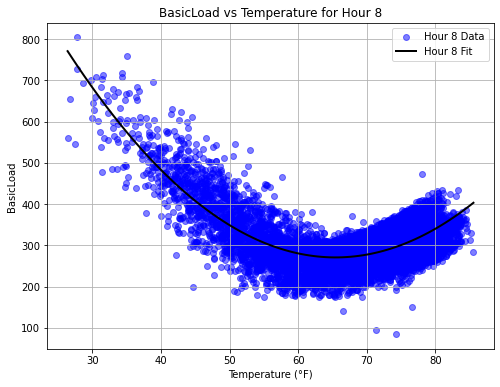

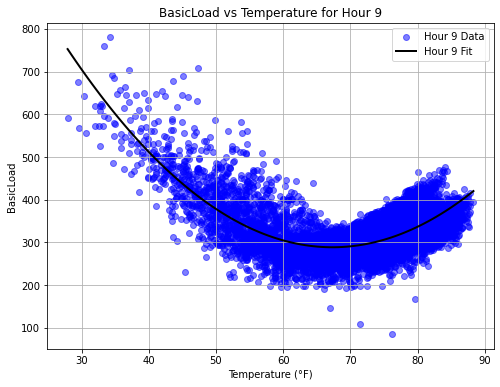

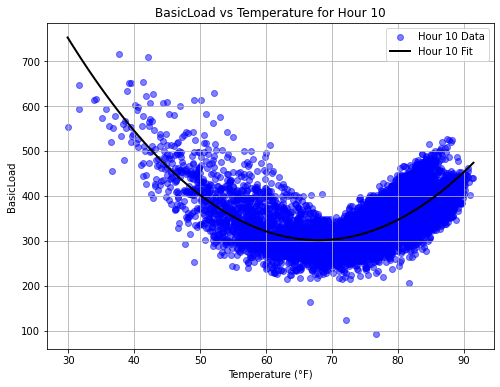

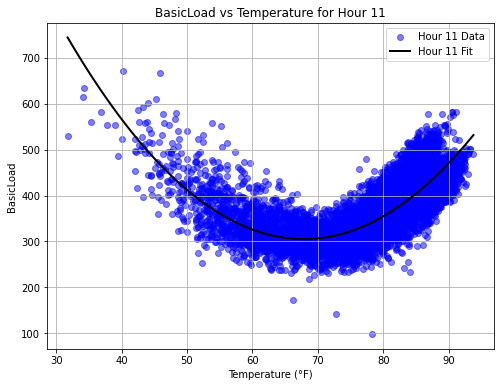

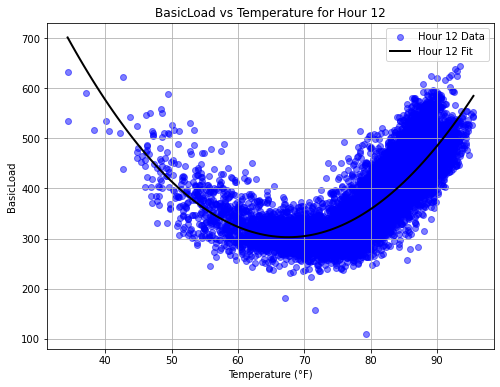

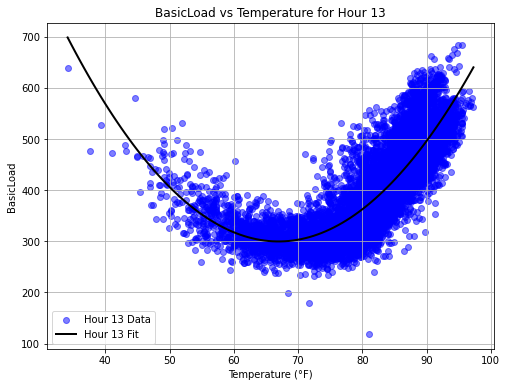

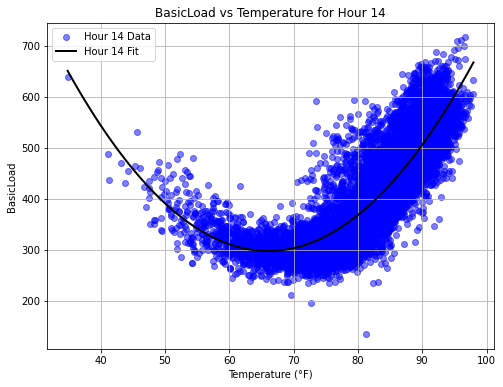

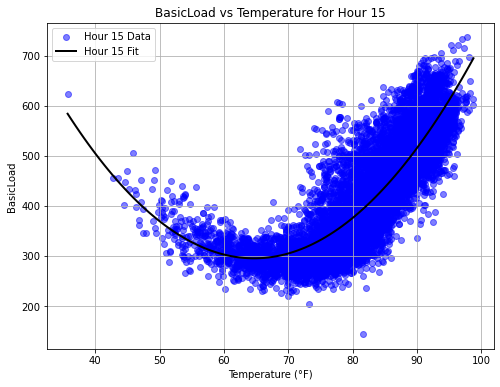

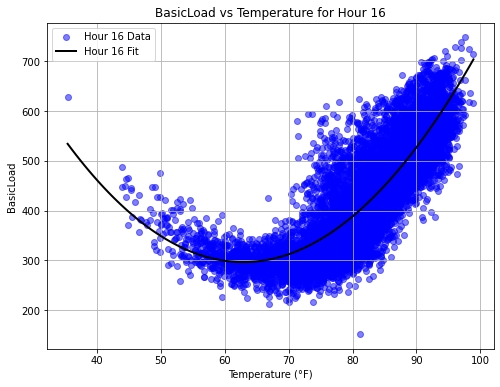

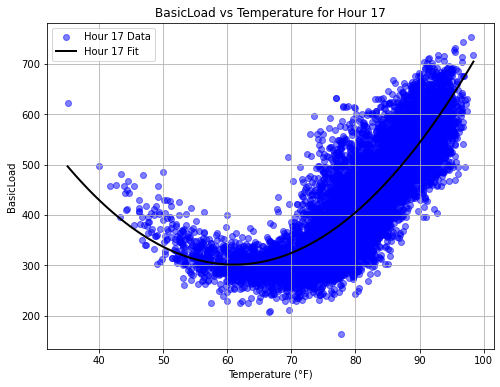

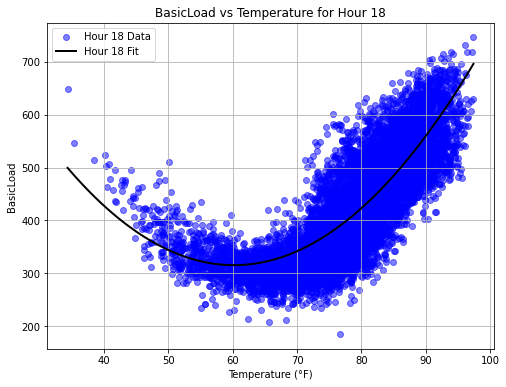

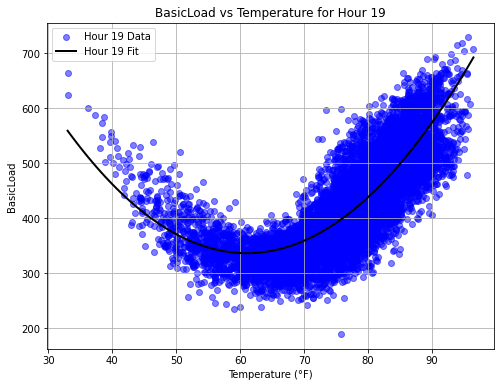

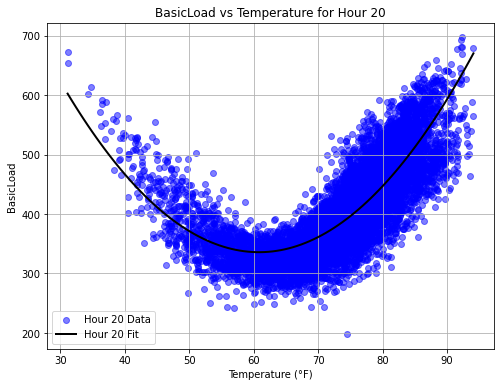

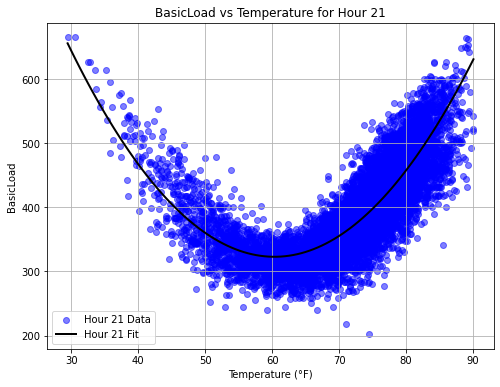

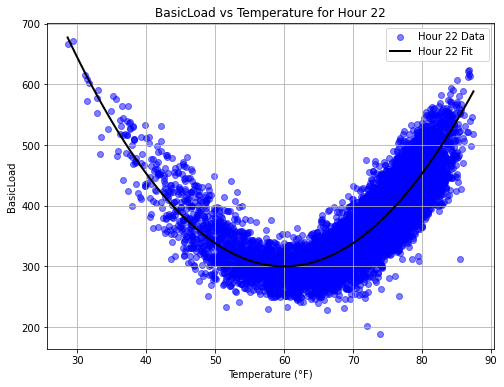

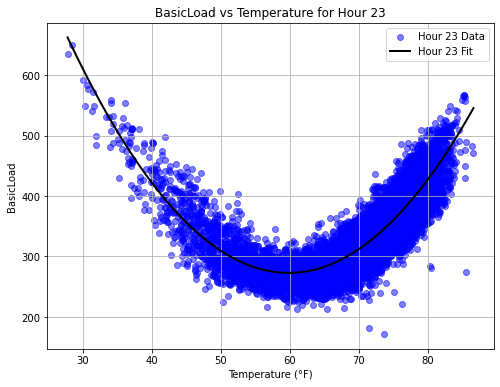

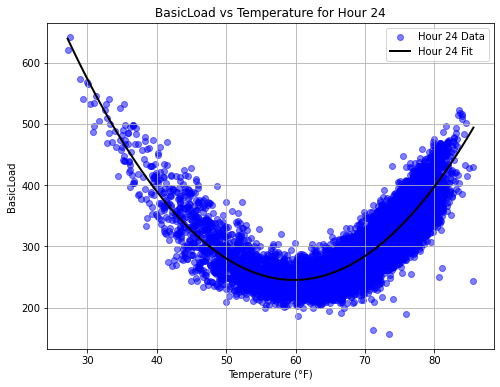


Polynomials for each hour:
Hour 1:         2
0.3668 x - 43.96 x + 1540
Hour 2:         2
0.3626 x - 43.63 x + 1521
Hour 3:         2
0.3582 x - 43.25 x + 1507
Hour 4:         2
0.3536 x - 42.86 x + 1497
Hour 5:         2
0.3535 x - 43.04 x + 1512
Hour 6:         2
0.3554 x - 43.67 x + 1561
Hour 7:         2
0.3552 x - 44.56 x + 1648
Hour 8:         2
0.3275 x - 42.86 x + 1673
Hour 9:         2
0.2987 x - 40.23 x + 1643
Hour 10:         2
0.3113 x - 42.29 x + 1738
Hour 11:        2
0.337 x - 45.72 x + 1856
Hour 12:         2
0.3612 x - 48.79 x + 1950
Hour 13:       2
0.37 x - 49.56 x + 1959
Hour 14:         2
0.3632 x - 47.99 x + 1883
Hour 15:         2
0.3435 x - 44.43 x + 1732
Hour 16:         2
0.3141 x - 39.51 x + 1539
Hour 17:         2
0.2892 x - 35.32 x + 1380
Hour 18:         2
0.2753 x - 33.14 x + 1313
Hour 19:        2
0.283 x - 34.54 x + 1391
Hour 20:         2
0.3021 x - 36.74 x + 1453
Hour 21:         2
0.3491 x - 42.12 x + 1594
Hour 22:        2
0.383 x - 45.95 x + 1678
H

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = "merged_load_weather_data.csv"
data = pd.read_csv(file_path)

# Ensure the 'Hour' column is numeric
data['Hour'] = pd.to_numeric(data['Hour'], errors='coerce')

# Prepare to store polynomials
hourly_polynomials = {}

# Loop over each hour and fit a polynomial
for hour in range(1, 25):  # Hours 1 to 24
    hourly_data = data[data['Hour'] == hour]
    temperature = hourly_data['Temp']
    load = hourly_data['BasicLoad']
    
    # Combine temperature and load into a single DataFrame for consistent filtering
    hourly_df = pd.DataFrame({'Temp': temperature, 'BasicLoad': load}).dropna()

    # Check if there is sufficient data for this hour
    if len(hourly_df) < 3:
        print(f"Not enough valid data to fit for Hour {hour}")
        continue

    # Check if the temperature and load have sufficient variance
    if hourly_df['Temp'].std() < 1e-6 or hourly_df['BasicLoad'].std() < 1e-6:
        print(f"Data for Hour {hour} has insufficient variance to fit a polynomial.")
        continue

    try:
        # Fit a 2nd-degree polynomial
        coeffs = np.polyfit(hourly_df['Temp'], hourly_df['BasicLoad'], 2)
        fitted_poly = np.poly1d(coeffs)
        
        # Store the polynomial for this hour
        hourly_polynomials[hour] = fitted_poly

        # Plot the data and fit
        plt.figure(figsize=(8, 6))
        plt.scatter(hourly_df['Temp'], hourly_df['BasicLoad'], label=f"Hour {hour} Data", color='blue', alpha=0.5)
        temp_range = np.linspace(hourly_df['Temp'].min(), hourly_df['Temp'].max(), 100)
        plt.plot(temp_range, fitted_poly(temp_range), label=f"Hour {hour} Fit", color='black', linewidth=2)
        plt.title(f"BasicLoad vs Temperature for Hour {hour}")
        plt.xlabel("Temperature (°F)")
        plt.ylabel("BasicLoad")
        plt.legend()
        plt.grid()
        plt.show()
    except np.linalg.LinAlgError as e:
        print(f"Error fitting polynomial for Hour {hour}: {e}")

# Output the polynomials
print("\nPolynomials for each hour:")
for hour, poly in hourly_polynomials.items():
    print(f"Hour {hour}: {poly}")


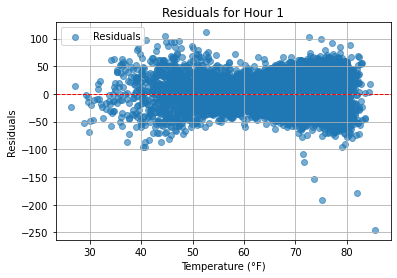

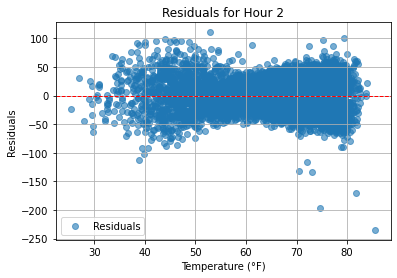

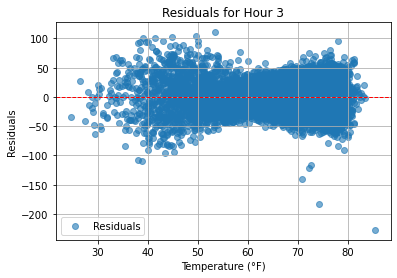

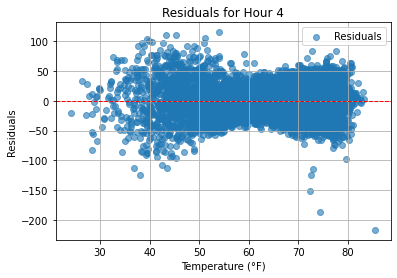

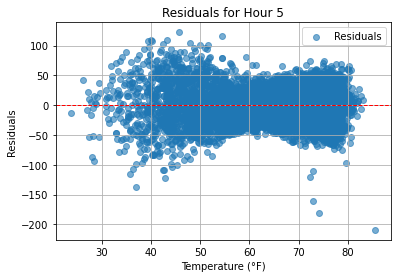

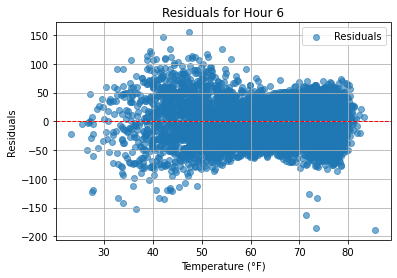

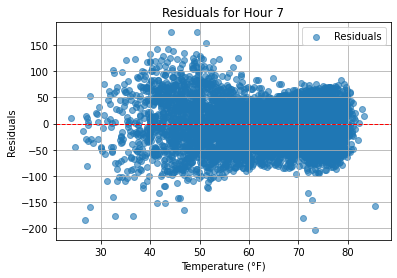

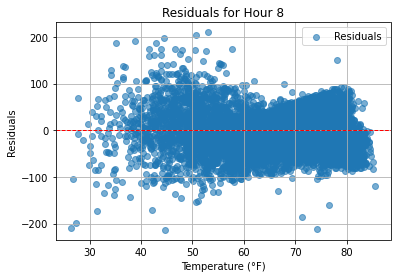

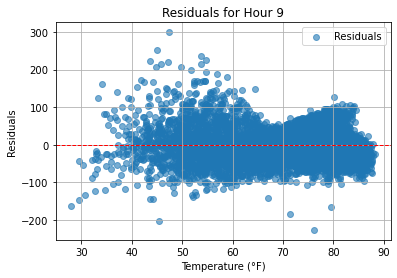

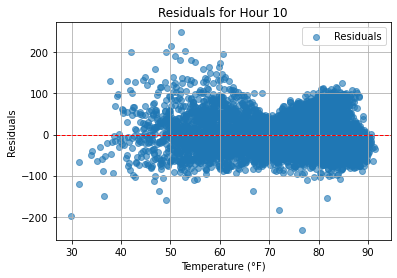

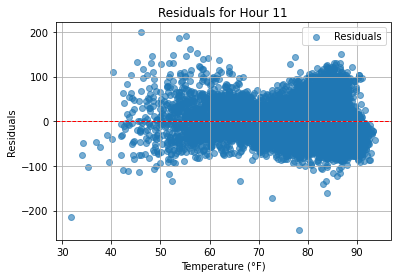

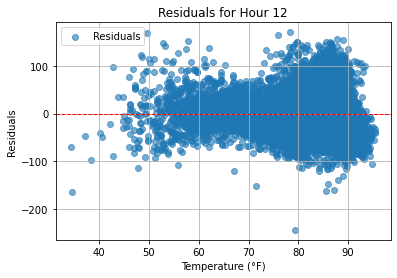

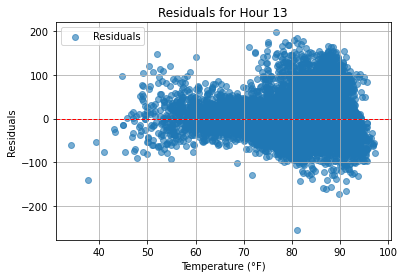

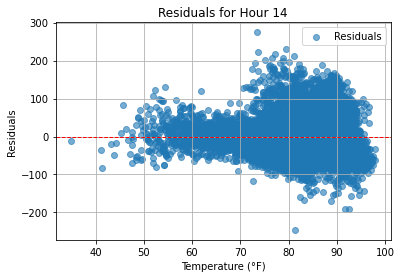

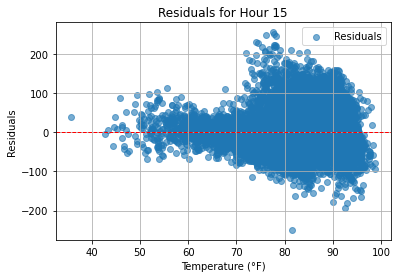

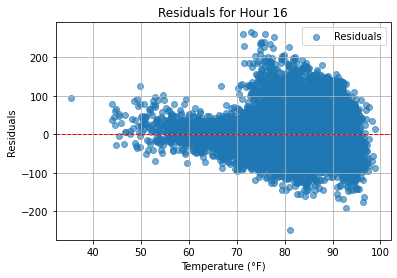

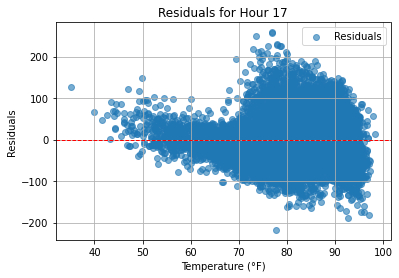

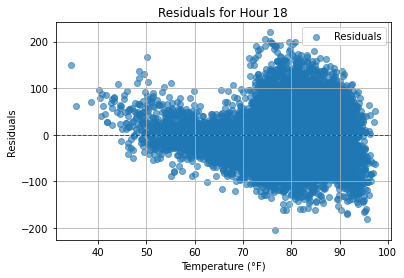

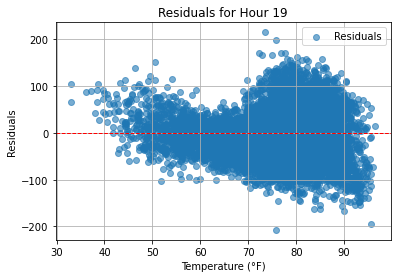

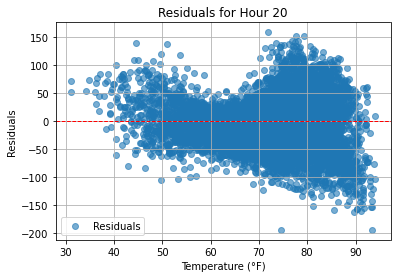

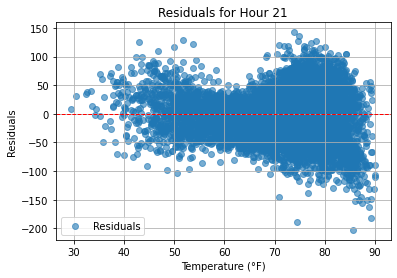

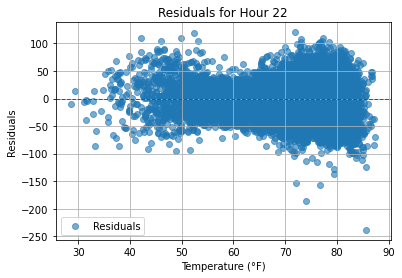

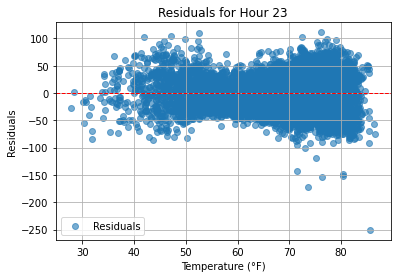

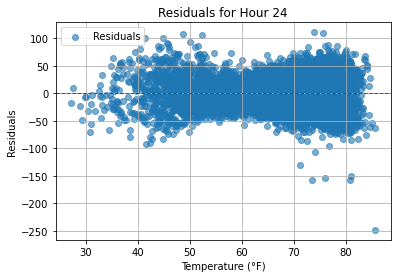


Evaluation Metrics for Each Hour:
    Hour        R²  Adjusted R²        MAE       RMSE
0      1  0.752724     0.752670  22.006663  27.309489
1      2  0.751177     0.751122  21.068419  26.306513
2      3  0.752119     0.752065  20.372921  25.646784
3      4  0.749002     0.748946  20.164871  25.691942
4      5  0.741814     0.741757  20.637542  26.601763
5      6  0.705380     0.705316  23.393174  30.226653
6      7  0.639948     0.639868  29.621870  37.143330
7      8  0.583902     0.583811  31.649284  40.668547
8      9  0.523363     0.523259  30.266193  40.262394
9     10  0.537253     0.537151  29.970650  38.996806
10    11  0.620289     0.620206  31.036048  39.910077
11    12  0.685320     0.685251  33.623484  43.349081
12    13  0.720926     0.720865  36.589888  47.406507
13    14  0.730629     0.730570  39.876302  51.840283
14    15  0.729478     0.729418  42.832714  55.417007
15    16  0.718773     0.718711  45.144849  58.027283
16    17  0.715352     0.715289  45.487230  57.

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize storage for evaluation metrics
evaluation_results = []

for hour, poly in hourly_polynomials.items():
    hourly_data = data[data['Hour'] == hour]
    temperature = hourly_data['Temp']
    load = hourly_data['BasicLoad']

    # Combine temperature and load into a single DataFrame for consistent filtering
    hourly_df = pd.DataFrame({'Temp': temperature, 'BasicLoad': load}).dropna()

    # Predicted values
    predicted_load = poly(hourly_df['Temp'])

    # Calculate R²
    ss_total = np.sum((hourly_df['BasicLoad'] - np.mean(hourly_df['BasicLoad']))**2)
    ss_residual = np.sum((hourly_df['BasicLoad'] - predicted_load)**2)
    r2 = 1 - (ss_residual / ss_total)

    # Calculate Adjusted R²
    n = len(hourly_df)
    p = 2  # Degree of the polynomial
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

    # Calculate MAE and RMSE
    mae = mean_absolute_error(hourly_df['BasicLoad'], predicted_load)
    rmse = np.sqrt(mean_squared_error(hourly_df['BasicLoad'], predicted_load))

    # Store results
    evaluation_results.append({'Hour': hour, 'R²': r2, 'Adjusted R²': adj_r2, 'MAE': mae, 'RMSE': rmse})

    # Residuals
    residuals = hourly_df['BasicLoad'] - predicted_load

    # Plot residuals
    plt.figure()
    plt.scatter(hourly_df['Temp'], residuals, alpha=0.6, label='Residuals')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.title(f'Residuals for Hour {hour}')
    plt.xlabel('Temperature (°F)')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid()
    plt.show()

# Display evaluation results as a table
results_df = pd.DataFrame(evaluation_results)
print("\nEvaluation Metrics for Each Hour:")
print(results_df)